## ***Visión por Computadora - 2024***
### *Lista 01 - Ejercicio 6*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------


6. Aplicar transformaciones apropiadas para mejorar la visualización de las siguientes imágenes: saigon.jpeg, monkey.jpeg y rice.jpg. Para la imagen rice.jpg, aplicar un algoritmo de segmentaci´on binaria que identifique correctamente todos los granos de arroz.

____
#### *Importar librerías*

Como primer paso, se importa numpy, cv2, y matplotlib.

In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters import threshold_niblack
from skimage.io import imread

In [36]:
# Cargamos las imágenes
rice_img = cv2.imread('imgs/rice.jpg', cv2.IMREAD_GRAYSCALE)
monkey_img = cv2.imread('imgs/monkey.jpeg', cv2.IMREAD_GRAYSCALE)
saigon_img = cv2.imread('imgs/saigon.jpeg')
saigon_img = cv2.cvtColor(saigon_img, cv2.COLOR_BGR2RGB)


loaded_images = all(img is not None for img in [rice_img, monkey_img, saigon_img])

if loaded_images:
    # Ecualización de histograma para mejorar el contraste
    equalized_monkey = cv2.equalizeHist(monkey_img)
else:
    equalized_monkey, equalized_saigon = None, None

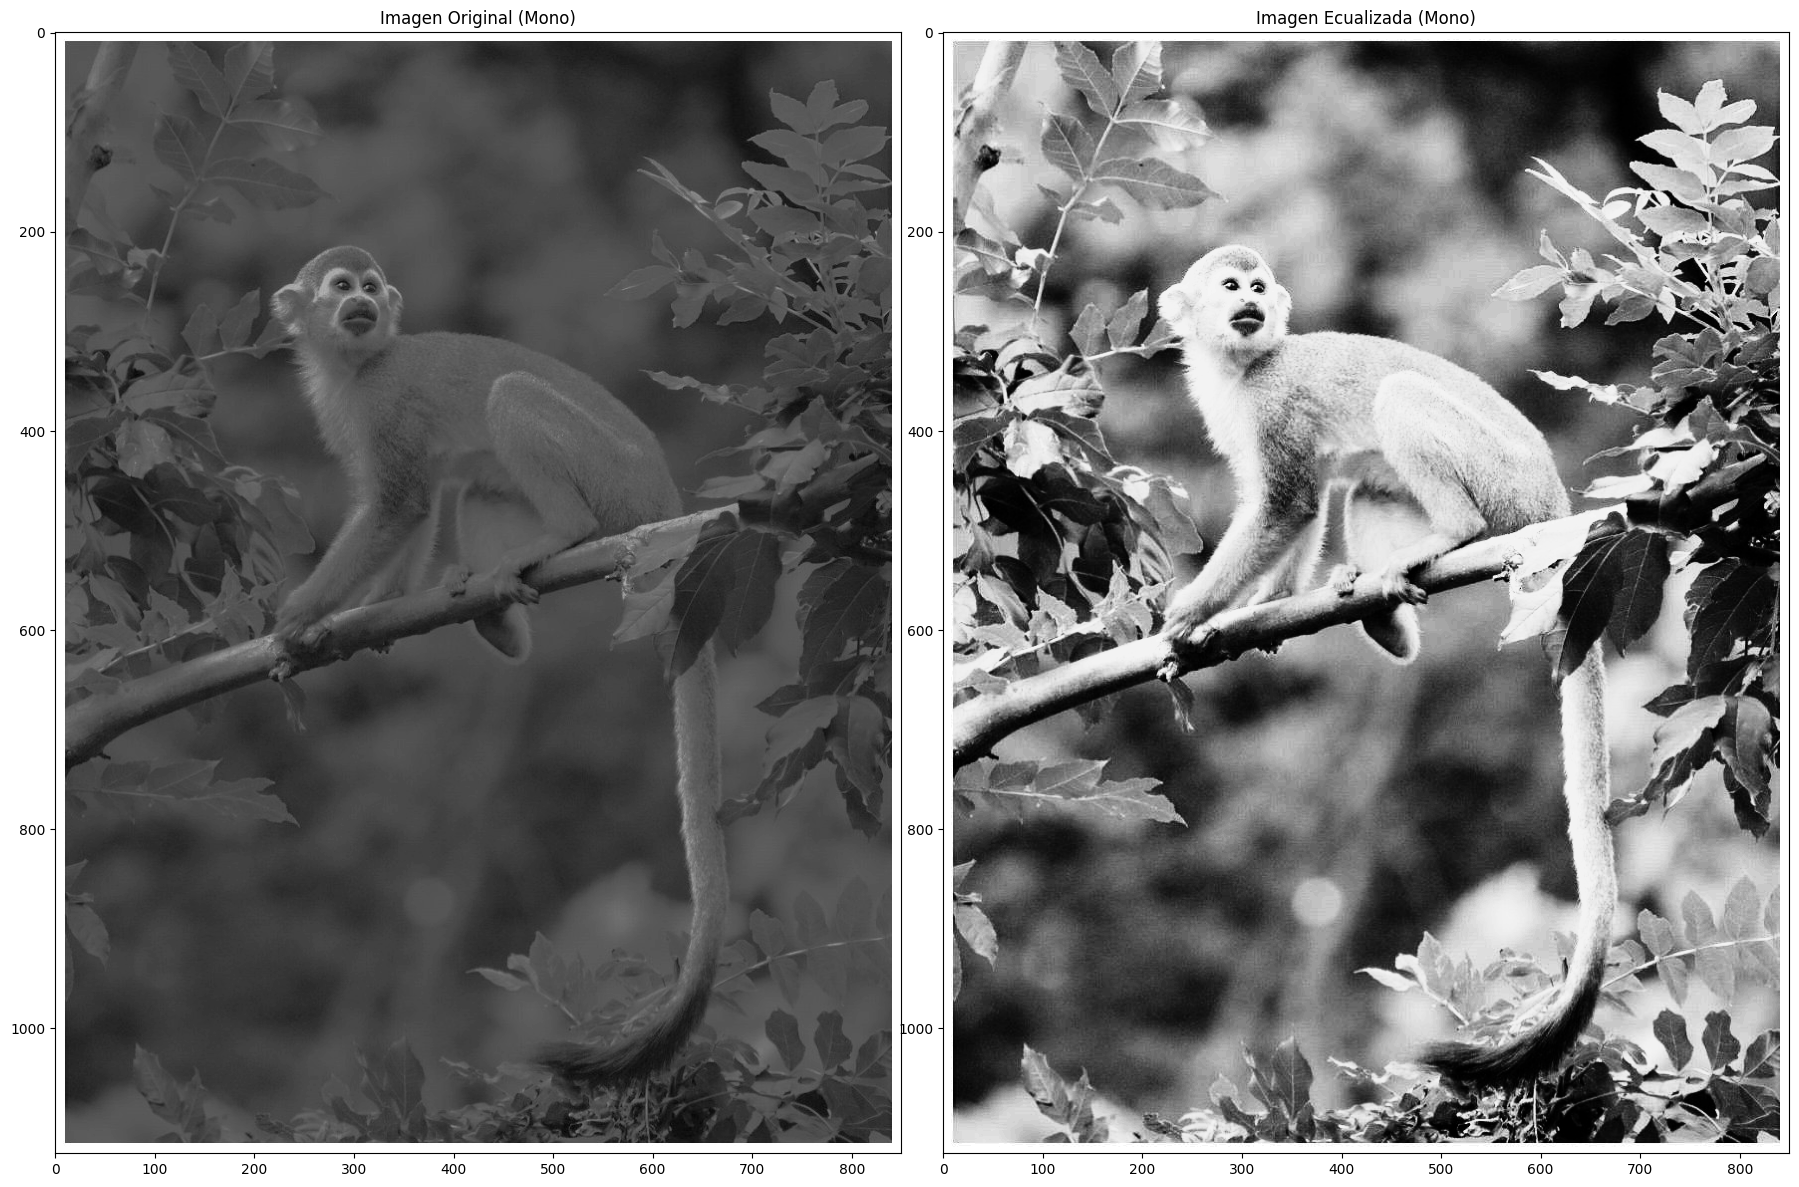

In [37]:
# Ecualización de histograma para mejorar el contraste
equalized_monkey = cv2.equalizeHist(monkey_img)

# Crear las subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 12))  
axs[0].imshow(monkey_img, cmap='gray')
axs[0].set_title('Imagen Original (Mono)')
axs[1].imshow(equalized_monkey, cmap='gray')
axs[1].set_title('Imagen Ecualizada (Mono)')

plt.subplots_adjust(bottom=0.2) 
plt.tight_layout()
plt.show()


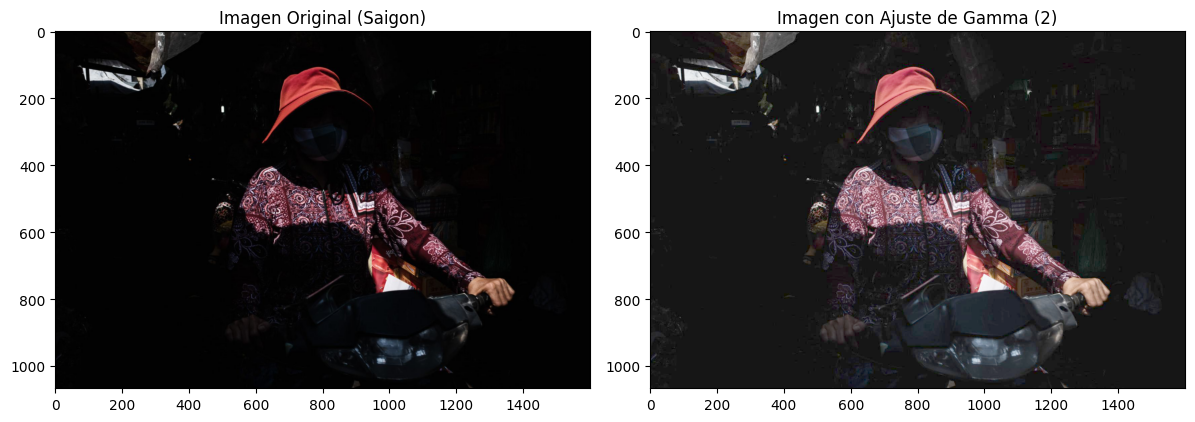

In [38]:
def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

    # Se aplica la corrección gamma utilizando la tabla de búsqueda.
    return cv2.LUT(image, table)

gamma = 2
adjusted_saigon = adjust_gamma(saigon_img, gamma=gamma)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(saigon_img)
plt.title('Imagen Original (Saigon)')

plt.subplot(1, 3, 2)
plt.imshow(adjusted_saigon)
plt.title(f'Imagen con Ajuste de Gamma ({gamma})')

plt.tight_layout()
plt.show()


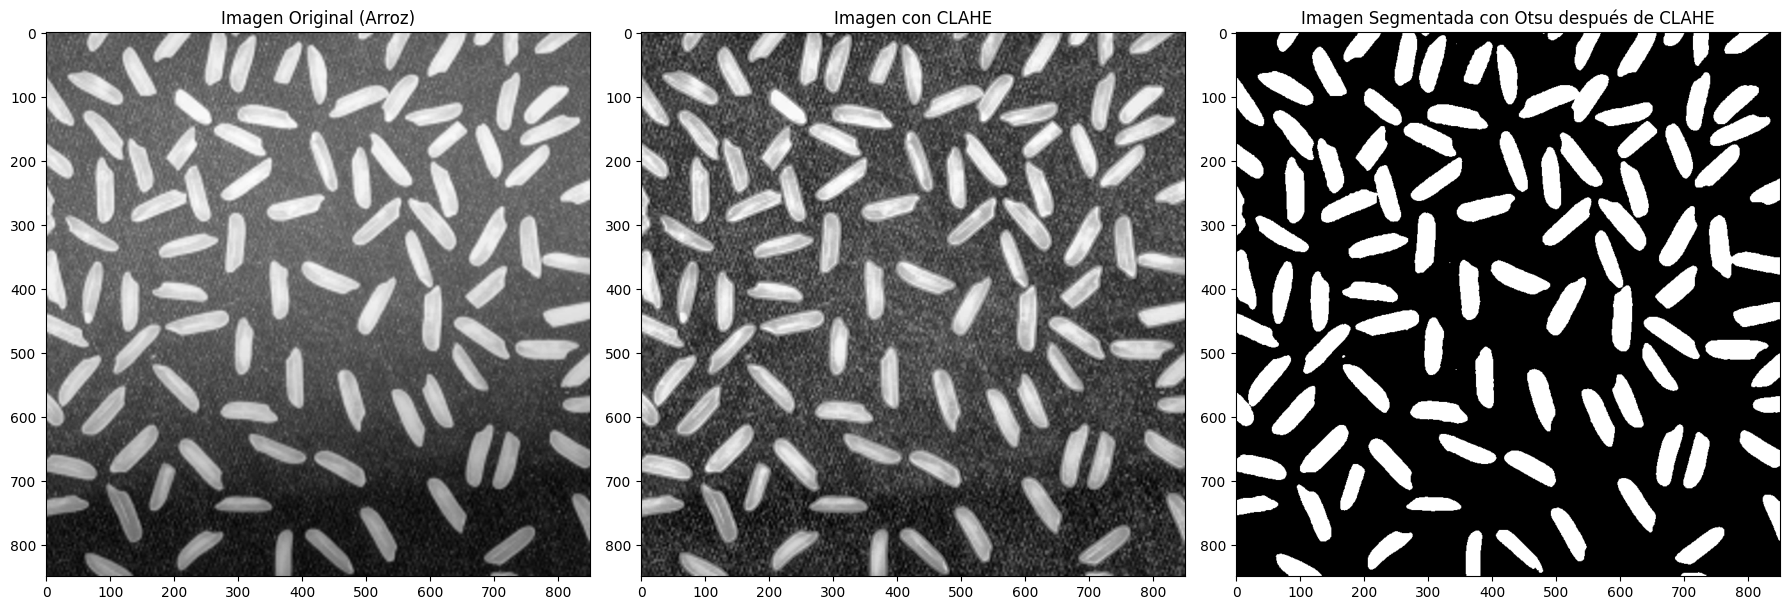

In [39]:
# CLAHE (Contrast Limited Adaptive Histogram Equalization) mejora el contraste localmente
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(rice_img)

# filtro Gaussiano suaviza la imagen
blurred_rice_img_clahe = cv2.GaussianBlur(clahe_img, (5, 5), 0)

# Otsu para la segmentación binaria
_, binary_rice_img_clahe = cv2.threshold(blurred_rice_img_clahe, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(rice_img, cmap='gray')
plt.title('Imagen Original (Arroz)')

plt.subplot(1, 3, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title('Imagen con CLAHE')

plt.subplot(1, 3, 3)
plt.imshow(binary_rice_img_clahe, cmap='gray')
plt.title('Imagen Segmentada con Otsu después de CLAHE')

plt.tight_layout()
plt.show()


1. **Ecualización de Histograma**:
   - Para `monkey_img` se utilizó la función `cv2.equalizeHist` para aplicar una ecualización de histograma global y mejorar el contraste de las imágenes.

2. **Ajuste de Gamma**:
   - Se aplicó un ajuste de gamma a `saigon_img` para aclarar las áreas oscuras y mejorar la visualización sin sobreexponer las áreas brillantes.

3. **Ecualización de Histograma Adaptativa (CLAHE)**:
   - Para `rice_img`, se utilizó CLAHE para realizar una ecualización de histograma adaptativa y mejorar el contraste local de la imagen.

4. **Filtro Gaussiano**:
   - Después de aplicar CLAHE a `rice_img`, se aplicó un filtro Gaussiano para suavizar la imagen y reducir el ruido, lo cual es particularmente útil antes de la segmentación.

5. **Segmentación Binaria con el Método de Otsu**:
   - Se utilizó el método de Otsu para convertir `rice_img` en una imagen binaria, lo cual es un paso crucial para la segmentación y análisis posteriores de los granos de arroz.

6. **Visualización**:
   - Se utilizaron subplots de Matplotlib para mostrar las imágenes antes y después de la ecualización.
   - Se ajustaron los márgenes de las subplots y se aseguró un layout adecuado para una visualización clara.
